# Car Price Prediction Model

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index) 

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

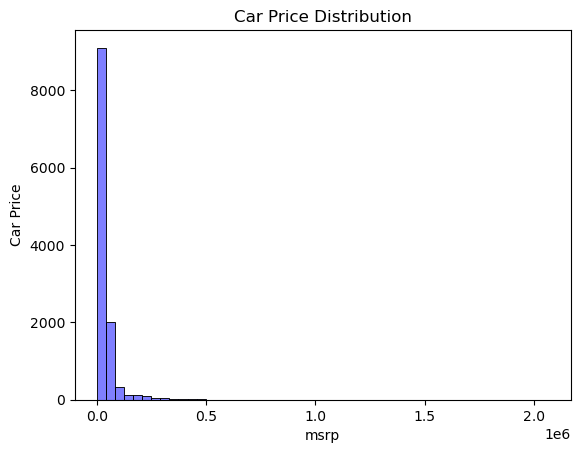

In [10]:
sns.histplot(df.msrp, color = 'blue', alpha = 0.5, bins = 50)

plt.ylabel('Car Price')
plt.title('Car Price Distribution')
plt.show()

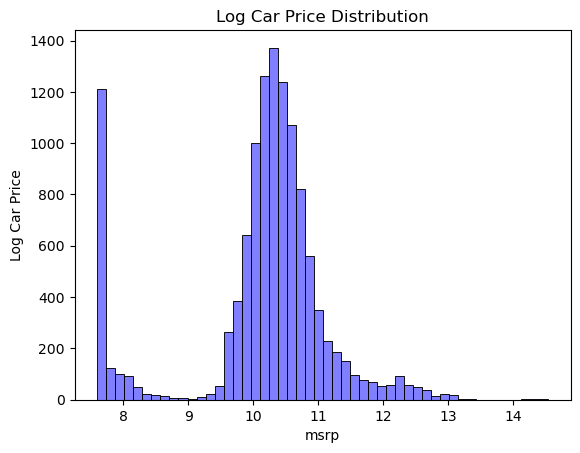

In [11]:
sns.histplot(np.log1p(df.msrp), color = 'blue', alpha = 0.5, bins = 50)

plt.ylabel('Log Car Price')
plt.title('Log Car Price Distribution')
plt.show()

In [12]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [13]:
#60 - 20 -20
n = len(df)
n

11914

In [14]:
n_val = int(n * 0.2)
n_test = int(n * 0.2) 
n_train = n - (n_val + n_test)

n, (n_val + n_test + n_train)

(11914, 11914)

In [15]:
idx = np.arange(n)

np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train: n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val: ]].copy()

In [16]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [17]:
#reset indices for df's
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
#set y vector
y_test = np.log1p(df_test['msrp'].values)
y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)

In [19]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [20]:
#Creating Model - numerical features

In [21]:
df_test.iloc[10]

make                             mazda
model                                3
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        155.0
engine_cylinders                   4.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    sedan
highway_mpg                         41
city_mpg                            29
popularity                         586
Name: 10, dtype: object

In [22]:
df_test.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])


    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]    

In [24]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [25]:
def prepare(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [26]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

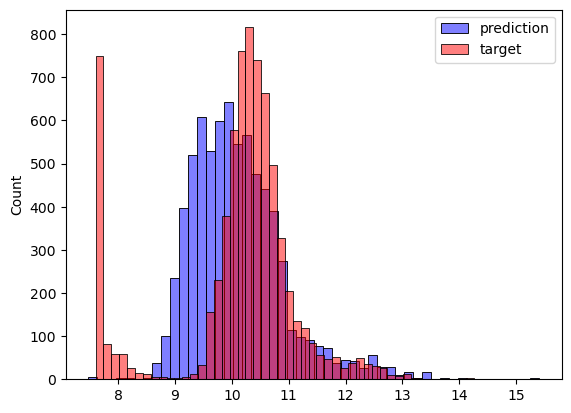

In [27]:
sns.histplot(y_pred, label='prediction', color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, label='target', color = 'red', alpha = 0.5, bins = 50)

plt.legend()
plt.show()

In [28]:
#feature engineering - add date

def prepare(df):
    df = df.copy()  
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X 

In [29]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [30]:
rmse(y_train, y_pred)

0.7554192603920132

[ 9.42481528  9.71833495 10.23946388 ... 10.74368095 12.14263879
 10.47222446]


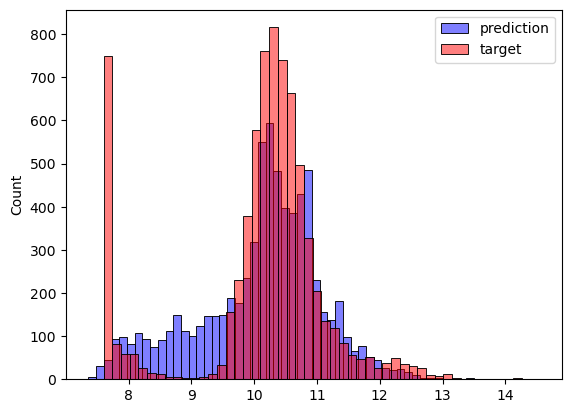

In [31]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print(y_pred)

sns.histplot(y_pred, label='prediction', color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, label='target', color = 'red', alpha = 0.5, bins = 50)

plt.legend()
plt.show()

In [32]:
rmse(y_train, y_pred)

0.5175055465840046

In [33]:
df_test.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [44]:
makes = list(df.make.value_counts().head().index)

In [46]:
def prepare(df):
    df = df.copy()     
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    
    return X 

[ 9.30638299  9.4955239  10.26538885 ... 10.7867624  12.17323964
 10.52537657]


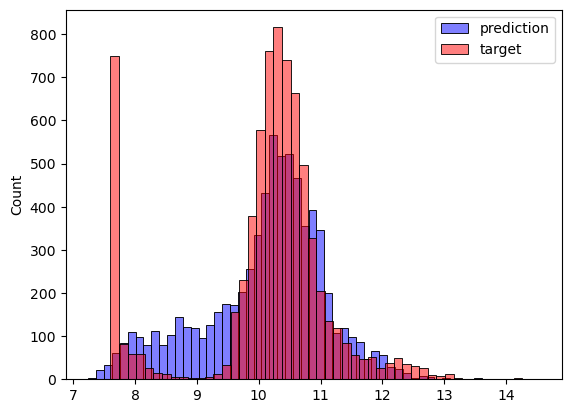

In [48]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print(y_pred)

sns.histplot(y_pred, label='prediction', color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, label='target', color = 'red', alpha = 0.5, bins = 50)

plt.legend()
plt.show()

In [56]:
fuel_type = list(df.engine_fuel_type.value_counts().head().index)
fuel_type

['regular_unleaded',
 'premium_unleaded_(required)',
 'premium_unleaded_(recommended)',
 'flex-fuel_(unleaded/e85)',
 'diesel']

In [66]:
def prepare(df):
    df = df.copy()  
    df['age'] = 2017 - df.year
    features = base + ['age']

    for type in fuel_type:
        df['fuel_type_%s' % type] = (df.engine_fuel_type == type).astype('int')
        features.append('fuel_type_%s' % type)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X 

[ 9.37341813  9.72166132 10.18733158 ... 10.53292422 12.277617
 10.53955622]


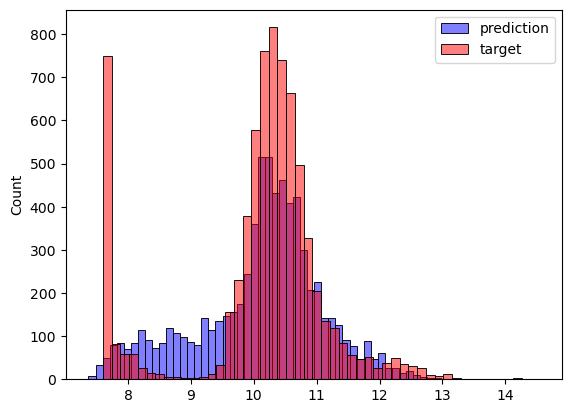

In [68]:
X_train = prepare(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print(y_pred)

sns.histplot(y_pred, label='prediction', color = 'blue', alpha = 0.5, bins = 50)
sns.histplot(y_train, label='target', color = 'red', alpha = 0.5, bins = 50)

plt.legend()
plt.show()

In [73]:
#regularisation

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [85]:
X_train = prepare(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w0 + X_train.dot(w)

rmse(y_pred, y_train) 

0.48343056206164453

In [87]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    #Apply model that we learnt from Training Dataset
    X_val = prepare(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred) 

    print(r, w0, score)
    

0.0 10.436602810458659 0.4778782381224393
1e-05 10.436598827554464 0.4778782423864254
0.0001 10.436562981742558 0.4778782807679235
0.001 10.43620455555072 0.4778786651505448
0.1 10.39712903150906 0.4779271282196786
1 10.070920789947603 0.47883740247874745
10 8.24988443657921 0.5006398359856052
